In [119]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/porto-seguro-safe-driver-prediction/sample_submission.csv
/kaggle/input/porto-seguro-safe-driver-prediction/train.csv
/kaggle/input/porto-seguro-safe-driver-prediction/test.csv


In [120]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier

pd.set_option('display.max_columns', 100)
%matplotlib inline
plt.rcParams['figure.figsize']= 10,10

In [121]:
train = pd.read_csv('/kaggle/input/porto-seguro-safe-driver-prediction/train.csv')
test = pd.read_csv('/kaggle/input/porto-seguro-safe-driver-prediction/test.csv')

In [122]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


The target columns means whether or not a claim was filed for that policy holder.

In [123]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

In [124]:
print(train.shape)
print(test.shape)

(595212, 59)
(892816, 58)


In [125]:
train.drop_duplicates()
train.shape

(595212, 59)

In [126]:
test.drop_duplicates()
test.shape

(892816, 58)

### Metadata

role: input, ID, target <br>
level: nominal, interval, ordinal, binary <br>
keep: True or False <br>
dtype: int, float, str <br>

In [127]:
data = []
for f in train.columns:
    
    # role
    if f == 'target':
        role = 'target'
    elif f == 'id':
        role = 'id'
    else:
        role = 'input'
        
    # level
    if 'bin' in f or f == 'target' :
        level = 'binary'
    elif 'cat' in f or f == 'id':
        level = 'nominal'
    elif train[f].dtype == float:
        level = 'interval'
    elif train[f].dtype == int:
        level = 'ordinal'
        
    # Id's keep is false
    keep = False if(f=='id') else True
    
    # data type
    dtype = train[f].dtype
    
    # create metadata
    f_dict = {
        'varname' : f,
        'role' : role,
        'level' : level,
        'keep' : keep,
        'dtype' : dtype
    }
    data.append(f_dict)
    
meta = pd.DataFrame(data, columns=['varname','role','level','keep','dtype'])
meta.set_index('varname',inplace=True)

In [128]:
meta

,role,level,keep,dtype
varname,,,,
id,id,nominal,False,int64
target,target,binary,True,int64
ps_ind_01,input,ordinal,True,int64
ps_ind_02_cat,input,nominal,True,int64
ps_ind_03,input,ordinal,True,int64
ps_ind_04_cat,input,nominal,True,int64
ps_ind_05_cat,input,nominal,True,int64
ps_ind_06_bin,input,binary,True,int64
ps_ind_07_bin,input,binary,True,int64


In [129]:
meta[(meta.level=='nominal')&(meta.keep)].index

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat',
       'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat',
       'ps_car_10_cat', 'ps_car_11_cat'],
      dtype='object', name='varname')

In [130]:
pd.DataFrame({'count': meta.groupby(['role','level'])['role'].size()}).reset_index()

,role,level,count
0,id,nominal,1
1,input,binary,17
2,input,interval,10
3,input,nominal,14
4,input,ordinal,16
5,target,binary,1


In [131]:
# interval
v = meta[(meta.level=='interval')&(meta.keep)].index
train[v].describe()

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.610991,0.439184,0.551102,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849
std,0.287643,0.404264,0.793506,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153
min,0.000000,0.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.200000,0.525000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000
50%,0.700000,0.300000,0.720677,0.374166,0.765811,0.368782,3.316625,0.500000,0.400000,0.500000
75%,0.900000,0.600000,1.000000,0.400000,0.906190,0.396485,3.605551,0.700000,0.700000,0.700000
max,0.900000,1.800000,4.037945,1.264911,3.720626,0.636396,3.741657,0.900000,0.900000,0.900000


**reg variables** <br>
* only ps_reg_03 has missing values
* the range (min to max) differs between the variables. We could apply scaling (e.g. StandardScaler), but it depends on the classifier we will want to use. <br>

**car variables** <br>
* ps_car_12 and ps_car_14 have missing values
* again, the range differs and we could apply scaling. <br>

**calc variables** <br>
* no missing values
* this seems to be some kind of ratio as the maximum is 0.9
* all three _calc variables have very similar distributions <br>

Overall, we can see that the range of the interval variables is rather small. <br>Perhaps some transformation (e.g. log) is already applied in order to anonymize the data?

In [132]:
# ordinal
v = meta[(meta.level=='ordinal') & (meta.keep)].index
train[v].describe()

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_car_11,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,1.900378,4.423318,0.012451,7.299922,2.346072,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026
std,1.983789,2.699902,0.127545,3.546042,0.832548,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652
min,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,5.000000,2.000000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000
50%,1.000000,4.000000,0.000000,7.000000,3.000000,2.000000,2.000000,8.000000,3.000000,9.000000,2.000000,8.000000,5.000000,1.000000,3.000000,7.000000
75%,3.000000,6.000000,0.000000,10.000000,3.000000,3.000000,3.000000,9.000000,4.000000,10.000000,3.000000,10.000000,7.000000,2.000000,4.000000,9.000000
max,7.000000,11.000000,4.000000,13.000000,3.000000,5.000000,6.000000,10.000000,9.000000,12.000000,7.000000,25.000000,19.000000,10.000000,13.000000,23.000000


* Only one missing variable: ps_car_11 <br>
* We could apply scaling to deal with the different ranges

In [133]:
# binary
v = meta[(meta.level=='binary')&(meta.keep)].index
train[v].describe()

,target,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.660823,0.121081,0.153446,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.473430,0.326222,0.360417,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


* The target in the train data is 3.645%, which is strongly imbalanced. <br>
* From the means we can conclude that for most variables the value is zero in most cases.

## Handling imbalanced classes

As we mentioned above the proportion of records with target=1 is far less than target=0. <br>This can lead to a model that has great accuracy but does have any added value in practice. Two possible strategies to deal with this problem are:

* oversampling records with target=1
* undersampling records with target=0 <br>

As we have a rather large training set, we can go for undersampling.

In [134]:
desired_balance=0.1

idx_0 = train[train.target==0].index
idx_1 = train[train.target==1].index

nb_0 = len(train.loc[idx_0])
nb_1 = len(train.loc[idx_1])
print(nb_1)
print(nb_0)

# Rate to undersample records with target = 0
undersampling_rate = ((1-desired_balance)*nb_1)/(nb_0*desired_balance)
# Number of records with target = 0 after undersampling
undersampled_nb_0 = int(undersampling_rate*nb_0)

print(undersampling_rate) 
print(undersampled_nb_0)

# Randomly select
undersampled_idx = shuffle(idx_0, random_state=37, n_samples=undersampled_nb_0)

# Construct list with remaining indicies
idx_list = list(undersampled_idx) + list(idx_1)

# Reture undersample data
train = train.loc[idx_list].reset_index(drop=True)

21694
573518
0.34043569687437886
195246


In [135]:
# Checking missing values (=-1)

vars_with_missing = []

for f in train.columns:
    missings = train[train[f]==-1][f].count()
    if(missings > 0):
        vars_with_missing.append(f)
        missing_perc = missings / train.shape[0]
        
        print('Varibale {} has {} missing values which is ({:.2%}) of total values'.format(f,missings,missing_perc))
        
print('In total, there are {} variables with missing values'.format(len(vars_with_missing)))

Varibale ps_ind_02_cat has 103 missing values which is (0.05%) of total values
Varibale ps_ind_04_cat has 51 missing values which is (0.02%) of total values
Varibale ps_ind_05_cat has 2256 missing values which is (1.04%) of total values
Varibale ps_reg_03 has 38580 missing values which is (17.78%) of total values
Varibale ps_car_01_cat has 62 missing values which is (0.03%) of total values
Varibale ps_car_02_cat has 2 missing values which is (0.00%) of total values
Varibale ps_car_03_cat has 148367 missing values which is (68.39%) of total values
Varibale ps_car_05_cat has 96026 missing values which is (44.26%) of total values
Varibale ps_car_07_cat has 4431 missing values which is (2.04%) of total values
Varibale ps_car_09_cat has 230 missing values which is (0.11%) of total values
Varibale ps_car_11 has 1 missing values which is (0.00%) of total values
Varibale ps_car_14 has 15726 missing values which is (7.25%) of total values
In total, there are 12 variables with missing values


* ps_car_03_cat(68.03%) and ps_car_05_cat(44.26%) have a large proportion of records with missing values. Remove these variables.
* For the other categorical variables with missing values, we can leave the missing value -1 as such.
* ps_reg_03 (continuous) has missing values for 18% of all records. Replace by the mean.
* ps_car_11 (ordinal) has only 5 records with misisng values. Replace by the mode.
* ps_car_12 (continuous) has only 1 records with missing value. Replace by the mean.
* ps_car_14 (continuous) has missing values for 7% of all records. Replace by the mean.

In [136]:
# Drop the variables with too many missing values
vars_to_drop = ['ps_car_03_cat','ps_car_05_cat']
train.drop(vars_to_drop, inplace=True, axis=1)
# update metadata
meta.loc[(vars_to_drop),'keep'] = False 

In [137]:
# Imputing with the mean or mode
mean_imp = SimpleImputer(missing_values=-1, strategy='mean')
mode_imp = SimpleImputer(missing_values=-1, strategy='most_frequent')

train['ps_reg_03'] = mean_imp.fit_transform(train[['ps_reg_03']]).ravel()
train['ps_car_12'] = mean_imp.fit_transform(train[['ps_car_12']]).ravel()
train['ps_car_14'] = mean_imp.fit_transform(train[['ps_car_14']]).ravel()
train['ps_car_11'] = mode_imp.fit_transform(train[['ps_car_11']]).ravel()

### Checking the cardinality of the categorical variables
Cardinality refers to the number of different values in a variable. As we will create dummy variables from the categorical variables later on, we need to check whether there are variables with many distinct values. We should handle these variables differently as they would result in many dummy variables.

In [138]:
v = meta[(meta.level=='nominal')& meta.keep].index
for f in v:
    #print( train[f].value_counts())
    dist_values = train[f].value_counts().shape[0]
    print('Variable {} has {} distinct values'.format(f, dist_values))

Variable ps_ind_02_cat has 5 distinct values
Variable ps_ind_04_cat has 3 distinct values
Variable ps_ind_05_cat has 8 distinct values
Variable ps_car_01_cat has 13 distinct values
Variable ps_car_02_cat has 3 distinct values
Variable ps_car_04_cat has 10 distinct values
Variable ps_car_06_cat has 18 distinct values
Variable ps_car_07_cat has 3 distinct values
Variable ps_car_08_cat has 2 distinct values
Variable ps_car_09_cat has 6 distinct values
Variable ps_car_10_cat has 3 distinct values
Variable ps_car_11_cat has 104 distinct values


In [139]:
train['ps_car_11_cat']

0          26
1         104
2          15
3          74
4          78
         ... 
216935    104
216936      5
216937    104
216938    104
216939     57
Name: ps_car_11_cat, Length: 216940, dtype: int64

In [140]:
def add_noise(series, noise_level):
    return series * (1+noise_level * np.random.randn(len(series)))

def target_encode(trn_series=None,
                 tst_series =None,
                  target=None,
                  min_samples_leaf = 1,
                  smoothing = 1,
                  noise_level=0):
    
    """
    Smoothing is computed like in the following paper by Daniele Micci-Barreca
    https://kaggle2.blob.core.windows.net/forum-message-attachments/225952/7441/high%20cardinality%20categoricals.pdf
    trn_series : training categorical feature as a pd.Series
    tst_series : test categorical feature as a pd.Series
    target : target data as a pd.Series
    min_samples_leaf (int) : minimum samples to take category average into account
    smoothing (int) : smoothing effect to balance categorical average vs prior  
    """ 
        
    assert len(trn_series) == len(target)
    assert trn_series.name == tst_series.name
    
    temp = pd.concat([trn_series, target], axis=1)
    # compute target mean
    averages = temp.groupby(by=trn_series.name)[target.name].agg(["mean","count"])
    print("===avg===")
    print(averages)
    # compute smoothing
    smoothing = 1 / (1+np.exp(-(averages['count']-min_samples_leaf)/smoothing))
    # apply average function to all target data
    prior = target.mean()
    print("===Prior===")
    print(prior)
    # The bigger the count the less full_avg is taken into account
    averages[target.name] = prior * (1-smoothing) + averages["mean"] * smoothing
    ft_trn_series = pd.merge(
        trn_series.to_frame(trn_series.name),
        averages.reset_index().rename(columns={'index':target.name, target.name:'average'}),
        on = trn_series.name,
        how='left'
    )['average'].rename(trn_series.name + '_mean').fillna(prior)
    print("===fillna===")
    print(ft_trn_series)

    
    # pd.merge does not keep the index, so restore it
    ft_trn_series.index = trn_series.index
    
    ft_tst_series = pd.merge(
    
        tst_series.to_frame(tst_series.name),
        averages.reset_index().rename(columns={'index':target.name, target.name:'average'}),
        on=tst_series.name,
        how='left'
    )['average'].rename(trn_series.name+'_mean').fillna(prior)
    
    ft_tst_series.index = tst_series.index
    return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)

In [141]:
train_encoded, test_encoded = target_encode(

    train["ps_car_11_cat"],
    test["ps_car_11_cat"],
    target=train.target,
    min_samples_leaf = 100,
    smoothing=10,
    noise_level=0.01
)
print("----------")
print(train_encoded)

===avg===
                   mean  count
ps_car_11_cat                 
1              0.108260   1247
2              0.103082    941
3              0.139078   1172
4              0.164966    588
5              0.113000   4646
...                 ...    ...
100            0.138773   1679
101            0.108035   2601
102            0.097127    731
103            0.074703   8661
104            0.121199  31601

[104 rows x 2 columns]
===Prior===
0.1
===fillna===
0         0.094660
1         0.121199
2         0.095791
3         0.085924
4         0.107903
            ...   
216935    0.121199
216936    0.113000
216937    0.121199
216938    0.121199
216939    0.067466
Name: ps_car_11_cat_mean, Length: 216940, dtype: float64
----------
0         0.094864
1         0.120944
2         0.095159
3         0.086315
4         0.108432
            ...   
216935    0.122572
216936    0.114053
216937    0.121599
216938    0.121112
216939    0.067119
Name: ps_car_11_cat_mean, Length: 216940, dtype:

In [142]:
train['ps_car_11_cat_te'] = train_encoded
train.drop('ps_car_11_cat',axis=1, inplace=True)
meta.loc['ps_car_11_cat','keep']=False
test['ps_car_11_cat_te'] = test_encoded
test.drop('ps_car_11_cat',axis=1,inplace=True)

<Figure size 576x396 with 0 Axes>

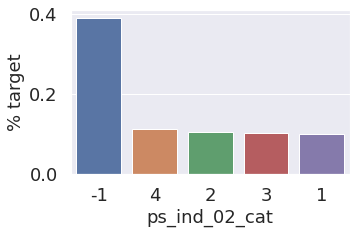

<Figure size 576x396 with 0 Axes>

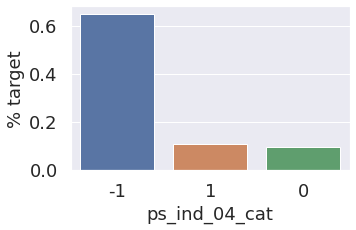

<Figure size 576x396 with 0 Axes>

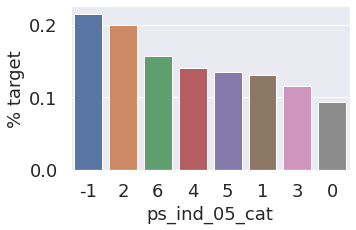

<Figure size 576x396 with 0 Axes>

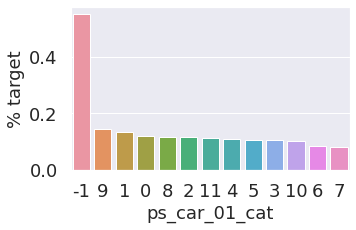

<Figure size 576x396 with 0 Axes>

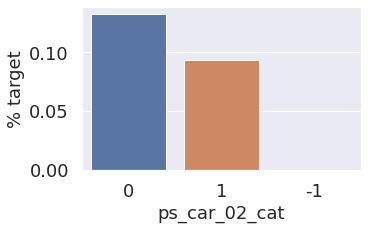

<Figure size 576x396 with 0 Axes>

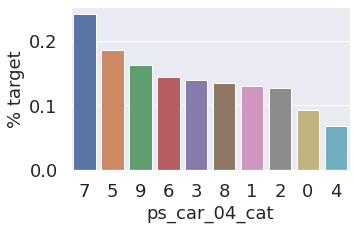

<Figure size 576x396 with 0 Axes>

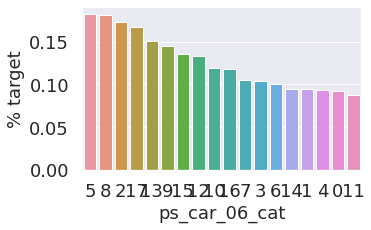

<Figure size 576x396 with 0 Axes>

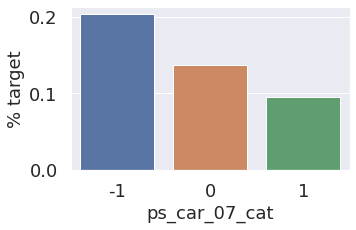

<Figure size 576x396 with 0 Axes>

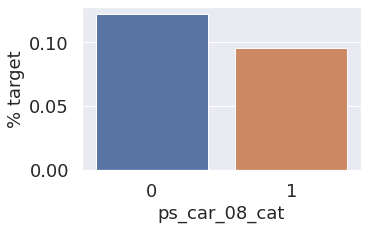

<Figure size 576x396 with 0 Axes>

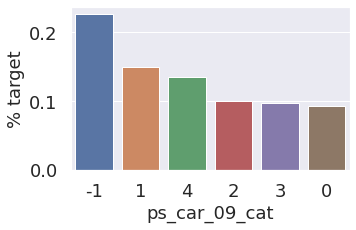

<Figure size 576x396 with 0 Axes>

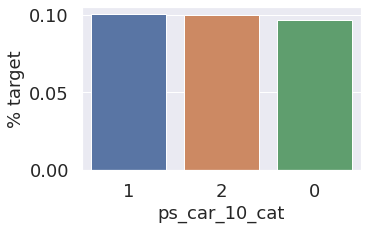

In [143]:
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)

v = meta[(meta.level=='nominal')&(meta.keep)].index
for f in v:
    plt.figure()
    fig, ax = plt.subplots(figsize=(5,3))
    # Calculate the percentage of target=1 per category value
    cat_perc = train[[f,'target']].groupby([f],as_index=False).mean()
    cat_perc.sort_values(by='target', ascending=False, inplace=True)
    #print("==="+f+"===")
    #print(cat_perc)
    
    sns.barplot(ax=ax, x=f, y='target', data=cat_perc, order=cat_perc[f])
    plt.ylabel('% target', fontsize=18)
    plt.xlabel(f, fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.show()

As we can see from the variables with missing values, it is a good idea to keep the missing values as a separate category value, instead of replacing them by the mode for instance. The customers with a missing value appear to have a much higher (in some cases much lower) probability to ask for an insurance claim.<br>


### **Interval variables**
Checking the correlations between interval variables. A heatmap is a good way to visualize the correlation between variables. The code below is based on an example by Michael Waskom

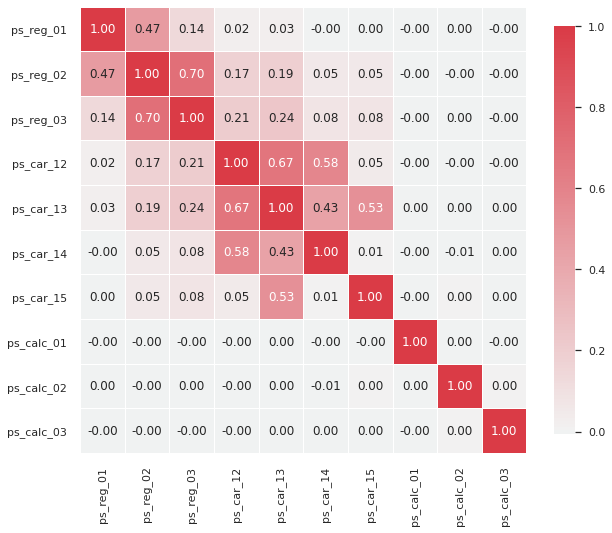

In [144]:
sns.set(font_scale=1)
def corr_heatmap(v):
    correlations = train[v].corr()
    
    cmap = sns.diverging_palette(220,10,as_cmap=True)
    
    fig,ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt='.2f', square=True, linewidths=.5, annot=True, cbar_kws={"shrink":.75} )
    plt.show()
    
v = meta[(meta.level=='interval')&(meta.keep)].index
corr_heatmap(v)

There are a strong correlations between the variables:

ps_reg_02 and ps_reg_03 (0.7)
ps_car_12 and ps_car13 (0.67)
ps_car_12 and ps_car14 (0.58)
ps_car_13 and ps_car15 (0.67)


Seaborn has some handy plots to visualize the (linear) relationship between variables. We could use a pairplot to visualize the relationship between the variables. But because the heatmap already showed the limited number of correlated variables, we'll look at each of the highly correlated variables separately.
NOTE: I take a sample of the train data to speed up the process.

In [145]:
s = train.sample(frac=0.1)
print(train.shape)
print(s.shape)

(216940, 57)
(21694, 57)


ps_reg_02 and ps_reg_03

As the regression line shows, there is a linear relationship between these variables. Thanks to the hue parameter we can see that the regression lines for target=0 and target=1 are the same.

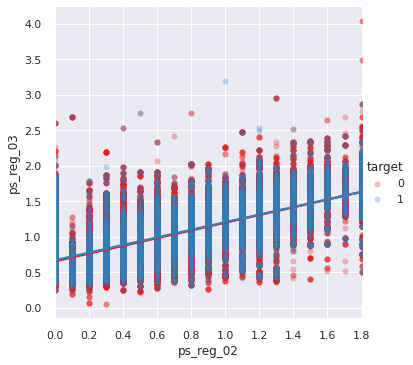

In [146]:
sns.lmplot(x='ps_reg_02',y='ps_reg_03', data=train, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

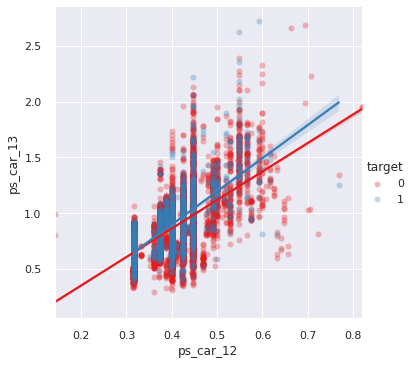

In [147]:
sns.lmplot(x='ps_car_12', y='ps_car_13', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

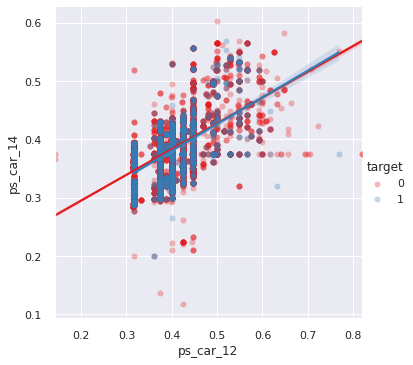

In [148]:
sns.lmplot(x='ps_car_12', y='ps_car_14', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

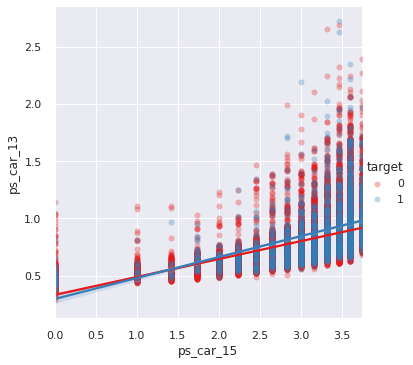

In [149]:
sns.lmplot(x='ps_car_15', y='ps_car_13', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

Allright, so now what? How can we decide which of the correlated variables to keep? We could perform Principal Component Analysis (PCA) on the variables to reduce the dimensions. In the AllState Claims Severity Competition I made this kernel to do that. But as the number of correlated variables is rather low, we will let the model do the heavy-lifting.



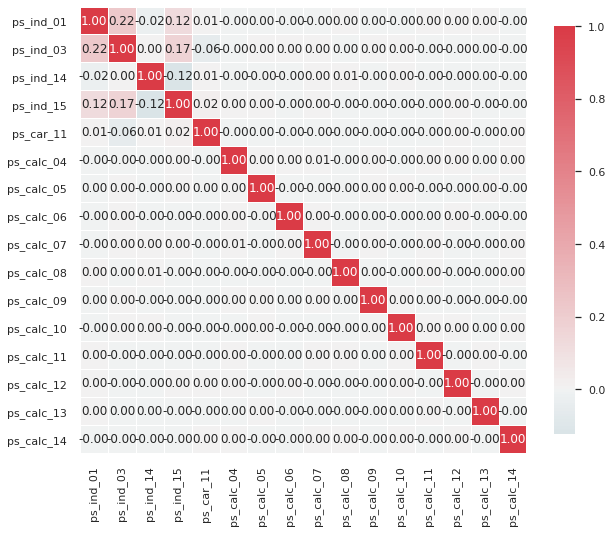

In [150]:
v = meta[(meta.level=='ordinal')&(meta.keep)].index
corr_heatmap(v)

In [151]:
v = meta[(meta.level=='nominal')&(meta.keep)].index
print("Before {}".format(train.shape[1]))
train = pd.get_dummies(train, columns=v, drop_first=True)
print("Affter {}".format(train.shape[1]))

Before 57
Affter 109


### Creating interaction variables

This adds extra interaction variables to the train data. 

Thanks to the get_feature_names method we can assign column names to these new variables.

In [152]:
v = meta[(meta.level=='interval')&(meta.keep)].index
poly = PolynomialFeatures(degree=2, interaction_only = False, include_bias = False)
interactions = pd.DataFrame(data=poly.fit_transform(train[v]), columns=poly.get_feature_names(v))
#print(interactions)
interactions.drop(v,axis=1,inplace=True)
print('Before {}'.format(train.shape[1]))
train = pd.concat([train,interactions], axis=1)
print('After {}'.format(train.shape[1]))


Before 109
After 164


### Feature selection¶

Removing features with low or zero variance

Personally, I prefer to let the classifier algorithm chose which features to keep. But there is one thing that we can do ourselves. That is removing features with no or a very low variance. Sklearn has a handy method to do that: VarianceThreshold. By default it removes features with zero variance. This will not be applicable for this competition as we saw there are no zero-variance variables in the previous steps. But if we would remove features with less than 1% variance, we would remove 31 variables.

In [153]:
selector = VarianceThreshold(threshold=.01)
selector.fit(train.drop(['id','target'], axis=1))

f = np.vectorize(lambda x : not x)

v = train.drop(['id','target'], axis=1).columns[f(selector.get_support())]
print('{} have too low variance'.format(len(v)))
print(list(v))

28 have too low variance
['ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_12', 'ps_car_14', 'ps_car_11_cat_te', 'ps_ind_05_cat_2', 'ps_ind_05_cat_5', 'ps_car_01_cat_1', 'ps_car_01_cat_2', 'ps_car_04_cat_3', 'ps_car_04_cat_4', 'ps_car_04_cat_5', 'ps_car_04_cat_6', 'ps_car_04_cat_7', 'ps_car_06_cat_2', 'ps_car_06_cat_5', 'ps_car_06_cat_8', 'ps_car_06_cat_12', 'ps_car_06_cat_16', 'ps_car_06_cat_17', 'ps_car_09_cat_4', 'ps_car_10_cat_1', 'ps_car_10_cat_2', 'ps_car_12^2', 'ps_car_12 ps_car_14', 'ps_car_14^2']


We would lose rather many variables if we would select based on variance. But because we do not have so many variables, we'll let the classifier chose. For data sets with many more variables this could reduce the processing time.


#### selecting features with a Random Forest and SelectFromModel

Here we'll base feature selection on the feature importances of a random forest. With Sklearn's SelectFromModel you can then specify how many variables you want to keep. You can set a threshold on the level of feature importance manually. But we'll simply select the top 50% best variables.


In [155]:
X_train = train.drop(['id','target'],axis=1)
y_train = train['target']

feat_labels = X_train.columns
rf = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)

rf.fit(X_train, y_train)
importances = rf.feature_importances_

indices = np.argsort(rf.feature_importances_)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,feat_labels[indices[f]], importances[indices[f]]))

AttributeError: 'RandomForestClassifier' object has no attribute 'feature_importance_'

In [ ]:
# With the get_support method we can then limit the number of variables in the train data

sfm = SelectFromModel(rf, threshold='median', prefit=True)
print("before {}".format(X_train.shape[1]))
n_features = sfm.transform(X_train).shape[1]
print("after {}".format(n_features))
selected_vars = list(feat_labels[sfm.get_support()])

In [ ]:
train = train[selected_vars + ['target']]

### Feature scaling¶

As mentioned before, we can apply standard scaling to the training data. Some classifiers perform better when this is done.

In [ ]:
scaler = StandardScaler()
scaler.fit_transform(train.drop(['target'], axis=1))